In [1]:
import os
import pandas as pd
from pathlib import Path
import numpy as np

In [2]:
proj_dir="/master/nplatt/schisto_aim_panel"
results_dir=f"{proj_dir}/results"

In [3]:
info_df=pd.read_csv(f"{proj_dir}/data/platt_et_al_2025_stable1.csv", sep=",", header=0)
info_df.head()

,Library ID,Museum Accession Number (NHM) or Donor ID,Predicted Species,Mitchondrial Haplotype,Population Assignment,NCBI SRA Accession,Project Citation,Country,Locality,Latitude,...,Original life-cycle stage collected,Life-cycle stage sequenced,Num Read Pairs (1e6),Coverage,Final SNV Dataset,Discordant COX1/ITS,% S. haematobium ancestry (q),Origin,Project (Collector),Comments
0,angola_cota_57,MCF03050E0612,S. haematobium,S. haematobium,S. haematobium (southern),SRR11907442,Herein,Angola,Source of the Cota river,-9.26186,...,cercariae,cercariae,76.6,32.96,True,NaN,100.00%,SCAN,Angola malacology survey 2013- NNTDCP/CIS and ...,NaN
1,angola_cota_58,MCF03050E0613,S. haematobium,S. haematobium,S. haematobium (southern),SRR11907441,Herein,Angola,Source of the Cota river,-9.26186,...,cercariae,cercariae,71.6,32.83,True,NaN,100.00%,SCAN,Angola malacology survey 2013- NNTDCP/CIS and ...,NaN
2,angola_cota_59,MCF03050E0614,S. haematobium,S. haematobium,S. haematobium (southern),SRR11907440,Herein,Angola,Source of the Cota river,-9.26186,...,cercariae,cercariae,66.5,25.61,True,NaN,100.00%,SCAN,Angola malacology survey 2013- NNTDCP/CIS and ...,NaN
3,angola_icau_60,MCF03050E0615,S. haematobium,S. haematobium,S. haematobium (southern),SRR11907439,Herein,Angola,Icau Wando village,-8.6451,...,miracidia,miracidia,56.7,25.73,True,NaN,100.00%,SCAN,Angola malacology survey 2013- NNTDCP/CIS and ...,NaN
4,angola_icau_61,MCF03050E0615,S. haematobium,S. haematobium,S. haematobium (southern),SRR11907438,Herein,Angola,Icau Wando village,-8.6451,...,miracidia,miracidia,75.3,30.40,True,NaN,100.00%,SCAN,Angola malacology survey 2013- NNTDCP/CIS and ...,NaN


# Prep Raw Data

In [5]:
os.chdir(f"{proj_dir}/data")

In [6]:
!cp ~/sch_hae_scan/results/filter_genotypes/scan_snvs.vcf.gz* .

## Filter the VCF file

In [7]:
Path(f"{results_dir}/prep_vcf").mkdir(parents=True, exist_ok=True)
os.chdir(f"{results_dir}/prep_vcf")

In [8]:
#which samples to exclude
info_df.loc[info_df["Final SNV Dataset"] == True]["Library ID"].to_csv("samples.include.list", sep=",", header=False, index=False)
!cat samples.include.list | wc -l

163


In [9]:
%%bash

conda run -n popgen --cwd . --live-stream\
    vcftools \
        --gzvcf ../../data/scan_snvs.vcf.gz \
        --maf 0.05 \
        --chr NC_067196.1 \
        --chr NC_067197.1 \
        --chr NC_067198.1 \
        --chr NC_067199.1 \
        --chr NC_067200.1 \
        --chr NC_067201.1 \
        --chr NC_067202.1 \
        --keep samples.include.list \
        --recode \
        --recode-INFO-all \
        --stdout \
        >autosomes_maf05.vcf


VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
/../data/scan_snvs.vcf.gz
	--chr NC_067196.1
	--chr NC_067197.1
	--chr NC_067198.1
1--chr NC_067199.
	--chr NC_067200.1
	--chr NC_067201.1
	--chr NC_067202.1
	--keep samples.include.list
FO-allode-IN
	--maf 0.05
	--recode
	--stdout

Using zlib version: 1.3.1
ted at least 2 parts in FORMAT entry: ID=PID,Number=1,Type=String,Description="Physical phasing ID information, where each unique ID within a given sample (but not across samples) connects records within a phasing group">
r,Description="Normalized, Phred-scaled likelihoods for genotypes as defined in the VCF specification">
conditional reference genotype confidence, encoded as a phred quality -10*log10 p(genotype call is wrong)">
llele count in genotypes, for each ALT allele, in the same order as listed">r,Description="A
ast 2 parts in INFO entry: ID=AC,Number=A,Type=Integer,Description="Allele count in genotypes, for each ALT allele, in the sa

In [10]:
%%bash

conda run -n popgen --live-stream \
    plink2 \
        --vcf autosomes_maf05.vcf \
        --allow-extra-chr \
        --double-id \
        --indep-pairwise 25 5 0.20 \
        --out ld

PLINK v2.00a5.12LM 64-bit Intel (25 Jun 2024)  www.cog-genomics.org/plink/2.0/
urcell, Christopher Chang   GNU General Public License v3
Logging to ld.log.
Options in effect:
allow-extra-chr
  --double-id
  --indep-pairwise 25 5 0.20
  --out ld
  --vcf autosomes_maf05.vcf

tart time: Thu Mar  6 17:53:57 2025
iB for main RAM detected, ~1017340 available; reserving 515643 M
workspace.
Using up to 192 threads (change this with --threads).
--vcf: 5972982 variants scanned.
--vcf: ld-temporary.pgen + ld-temporary.pvar.zst + ld-temporary.psam written.
s, 0 males, 163 ambiguous; 163 founders) loaded from
ld-temporary.psam.
 ld-temporary.pvar.zst. from
Note: No phenotype data present.
done.lating allele frequencies... 0%
5591481/5972982 variants removed.ds): 0%
Variant lists written to ld.prune.in and ld.prune.out .
End time: Thu Mar  6 17:54:58 2025


In [ ]:
%%bash

conda run -n vcftools --live-stream \
    vcftools \
        --vcf autosomes_maf05.vcf \
        --exclude ld.prune.out \
        --recode \
        --recode-INFO-all \
        --stdout \
        >scan_autosomes_maf05_ld.vcf

echo "snv_id" >all_snvs.list; grep -v "#" scan_autosomes_maf05_ld.vcf | cut -f3 >>all_snvs.list

# PCA

In [4]:
Path(f"{results_dir}/pca").mkdir(parents=True, exist_ok=True)
os.chdir(f"{results_dir}/pca")

In [80]:
%%bash
conda run -n popgen --cwd . --live-stream\
    plink2 \
        --threads 12 \
        --vcf ../prep_vcf/scan_autosomes_maf05_ld.vcf \
        --pca 10 biallelic-var-wts \
        --double-id \
        --allow-extra-chr \
        --out pca

PLINK v2.00a5.12LM 64-bit Intel (25 Jun 2024)  www.cog-genomics.org/plink/2.0/
urcell, Christopher Chang   GNU General Public License v3
Logging to pca.log.
Options in effect:
-allow-extra-chr
  --double-id
  --out pca
  --pca 10 biallelic-var-wts
  --threads 12
ep_vcf/scan_autosomes_maf05_ld.vcf

Start time: Mon Mar 17 13:25:47 2025
998283 available; reserving 515643 MiB for main
workspace.
--threads). 12 threads (change this with 
--vcf: 381501 variants scanned.
--vcf: pca-temporary.pgen + pca-temporary.pvar.zst + pca-temporary.psam
written.
ales, 0 males, 163 ambiguous; 163 founders) loaded from
pca-temporary.psam.
rom pca-temporary.pvar.zst.
Note: No phenotype data present.
done.lating allele frequencies... 0%
done.ructing GRM: 0%
done.cting for missingness... 0%
done.cting eigenvalues and eigenvectors... 
--pca: Variant weights written to pca.eigenvec.var .
ec , and eigenvalues written topca.eigenv
pca.eigenval .
End time: Mon Mar 17 13:25:51 2025


In [6]:
#get eigen values and sample labels
pca_df=pd.read_csv("pca.eigenvec", sep="\t", header=0)
pca_df=pca_df.drop("#FID", axis=1)

#merge the dataframes
pca_df=pca_df.merge(info_df, how='left', left_on="IID", right_on='Library ID')

#fix the country which contains some float NaNs
pca_df["country"] = pca_df["Country"].astype(str)

countries = sorted(pca_df["country"].unique().astype(str))
pca_df.to_csv("pca_df.csv", sep=",", header=True, index=False)
pca_df


,IID,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,Life-cycle stage sequenced,Num Read Pairs (1e6),Coverage,Final SNV Dataset,Discordant COX1/ITS,% S. haematobium ancestry (q),Origin,Project (Collector),Comments,country
0,NG_au_1.2,-0.193788,0.034904,-0.000030,0.007716,0.004214,-0.001483,-0.003820,-0.014784,-0.056267,...,adult worm (natural),55.6,20.53,True,NaN,0.00%,Texas Biomedical Research Institute,TxBiomed Nigeria 2019 (Egie Elisha Enabulele),Adult worms were collected directly from cattl...,Nigeria
1,NG_au_2.10,-0.192712,0.034114,-0.000016,0.008737,0.004191,0.000039,-0.004853,-0.012376,-0.063461,...,adult worm (natural),52.1,23.15,True,NaN,0.00%,Texas Biomedical Research Institute,TxBiomed Nigeria 2019 (Egie Elisha Enabulele),Adult worms were collected directly from cattl...,Nigeria
2,NG_au_2.13,-0.193488,0.034479,-0.000407,0.005152,0.004661,0.001240,-0.006628,-0.013438,-0.061754,...,adult worm (natural),53.0,23.30,True,NaN,0.00%,Texas Biomedical Research Institute,TxBiomed Nigeria 2019 (Egie Elisha Enabulele),Adult worms were collected directly from cattl...,Nigeria
3,NG_au_2.5,-0.192770,0.034375,0.001173,0.001757,0.005212,0.001661,-0.002561,-0.005953,-0.057693,...,adult worm (natural),58.1,24.73,True,NaN,0.00%,Texas Biomedical Research Institute,TxBiomed Nigeria 2019 (Egie Elisha Enabulele),Adult worms were collected directly from cattl...,Nigeria
4,NG_au_2.6,-0.191722,0.034577,-0.000658,0.008808,0.005192,0.000453,-0.003978,-0.019422,-0.066838,...,adult worm (natural),62.6,27.05,True,NaN,0.00%,Texas Biomedical Research Institute,TxBiomed Nigeria 2019 (Egie Elisha Enabulele),Adult worms were collected directly from cattl...,Nigeria
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,niger_libore_166,0.019183,-0.080569,-0.019166,-0.068836,0.015894,-0.087431,-0.030895,-0.041804,-0.014130,...,cercariae,81.6,41.80,True,NaN,96.11%,SCAN,SCORE Niger non-SCORE site,NaN,Niger
159,niger_libore_167,0.020423,-0.080046,-0.008740,-0.064435,0.025870,-0.069314,-0.002363,-0.010881,-0.027030,...,cercariae,63.2,31.23,True,NaN,95.97%,SCAN,SCORE Niger non-SCORE site,NaN,Niger
160,niger_libore_168,0.018833,-0.078780,-0.017340,-0.061889,0.005610,-0.040905,0.000884,-0.060515,-0.057258,...,cercariae,72.4,39.19,True,NaN,95.78%,SCAN,SCORE Niger non-SCORE site,NaN,Niger
161,niger_libore_169,0.020519,-0.074870,-0.018572,-0.053636,0.014773,-0.056789,0.007042,-0.014465,-0.054662,...,cercariae,95.9,50.42,True,NaN,95.79%,SCAN,SCORE Niger non-SCORE site,NaN,Niger


In [7]:
load_df = pd.read_csv("pca.eigenvec.var", sep="\t", header=0)
load_df

,#CHROM,ID,MAJ,NONMAJ,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,NC_067196.1,NC_067196.1:124178,G,A,0.012365,-0.714895,-0.723925,-1.320450,0.266694,-2.035130,-0.469571,-1.584920,-0.756923,1.307550
1,NC_067196.1,NC_067196.1:124348,C,T,-1.445740,0.150689,0.020491,-0.275756,-0.086177,0.801506,0.040874,0.391634,0.155756,0.027516
2,NC_067196.1,NC_067196.1:147062,C,T,0.023921,0.330576,-1.478740,-0.996338,-1.159510,-0.259998,-0.318578,-0.422366,-1.043130,-0.490766
3,NC_067196.1,NC_067196.1:147068,A,G,-0.050416,0.401561,1.356070,-0.471797,-3.279440,-0.269080,-0.378691,-0.949188,0.266428,-2.222620
4,NC_067196.1,NC_067196.1:147073,T,C,0.135362,-0.632912,-0.313124,-1.177480,-0.024240,-0.535229,-0.071790,1.076730,-0.543754,0.828660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381496,NC_067202.1,NC_067202.1:19477842,G,A,0.416074,1.226460,-0.715713,-0.377231,1.309830,0.554327,-0.348369,0.547959,0.704014,-0.701143
381497,NC_067202.1,NC_067202.1:19478168,G,A,-1.225090,0.391251,-0.002367,-0.372408,0.250229,0.091730,0.369197,-0.262899,-1.883950,-0.324486
381498,NC_067202.1,NC_067202.1:19478217,T,C,0.342474,-0.307112,1.138420,0.464008,-1.248870,-0.071293,-0.527961,0.190637,0.767121,-0.538887
381499,NC_067202.1,NC_067202.1:19478231,C,A,0.242100,1.106530,-2.056900,-0.550473,-2.134520,0.275645,0.154529,0.017168,-0.326367,1.347930


In [29]:
#select either the top most informative variants across all PCS

n_snvs = 100_000
n_pcs = 5
pc_columns = [f'PC{i}' for i in range(1, n_pcs)]
load_df['PC_sum'] = load_df[pc_columns].sum(axis=1)

# Get the top X rows based on PC_sum
top = load_df.sort_values(by='PC_sum', ascending=False).head(n_snvs)
top["ID"].to_csv(f"top_variants.list", sep=",", header=True, index=False)

# max_pcs = 10
# n_snvs_per_pc = 10000

# %env MAX_PCS=$max_pcs
# %env N_SNVS=$n_snvs_per_pc

# # Dictionary to store top variants for each PC
# top_variants_per_pc = {}

# # Iterate over the first six PCs
# for i in range(1, max_pcs + 1):  # Assuming PCs start from column index 1
#     pc_name = f"PC{i}"  # Get column name for reference
#     top_variants_per_pc[pc_name] = load_df.nlargest(n_snvs_per_pc, pc_name)

# # Combine all selected variants into a single DataFrame
# top_variants_all_pcs = pd.concat(top_variants_per_pc.values()).drop_duplicates()

# top_variants_all_pcs.to_csv(f"top_variants_pc1-{max_pcs}_n{n_snvs_per_pc}.csv", sep=",", header=True, index=False)
# top_variants_all_pcs["ID"].to_csv(f"top_variants_pc1-{max_pcs}_n{n_snvs_per_pc}.list", sep=",", header=True, index=False)
# top_variants_all_pcs

In [30]:
%%bash

conda run -n popgen --cwd . --live-stream\
    vcftools \
        --vcf ../prep_vcf/scan_autosomes_maf05_ld.vcf \
        --snps top_variants.list \
        --recode \
        --recode-INFO-all \
        --stdout \
        >top_variants.vcf


VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
rep_vcf/scan_autosomes_maf05_ld.vcf
	--recode-INFO-all
	--recode
	--snps top_variants.list
	--stdout

ted at least 2 parts in FORMAT entry: ID=PID,Number=1,Type=String,Description="Physical phasing ID information, where each unique ID within a given sample (but not across samples) connects records within a phasing group">
r,Description="Normalized, Phred-scaled likelihoods for genotypes as defined in the VCF specification">
conditional reference genotype confidence, encoded as a phred quality -10*log10 p(genotype call is wrong)">
llele count in genotypes, for each ALT allele, in the same order as listed">r,Description="A
ast 2 parts in INFO entry: ID=AC,Number=A,Type=Integer,Description="Allele count in genotypes, for each ALT allele, in the same order as listed">
F,Number=A,Type=Float,Description="Allele Frequency, for each ALT allele, in the same order as listed">
Frequency, for each ALT allele, 

In [31]:
%%bash

conda run -n popgen --cwd . --live-stream\
    plink2 \
        --threads 12 \
        --vcf top_variants.vcf \
        --pca 10 \
        --double-id \
        --allow-extra-chr \
        --out pca.top_variants

PLINK v2.00a5.12LM 64-bit Intel (25 Jun 2024)  www.cog-genomics.org/plink/2.0/
urcell, Christopher Chang   GNU General Public License v3
Logging to pca.top_variants.log.
n effect:
  --allow-extra-chr
  --double-id
  --out pca.top_variants
  --pca 10
  --threads 12
cf top_variants.vcf

Start time: Mon Mar 17 13:56:34 2025
le; reserving 515643 MiB for main5 availab
workspace.
Using up to 12 threads (change this with --threads).
--vcf: 100000 variants scanned.
--vcf: pca.top_variants-temporary.pgen + pca.top_variants-temporary.pvar.zst +
porary.psam written.
163 samples (0 females, 0 males, 163 ambiguous; 163 founders) loaded from
op_variants-temporary.psam.
100000 variants loaded from pca.top_variants-temporary.pvar.zst.
o phenotype data present.
done.lating allele frequencies... 0%
done.ructing GRM: 0%
done.cting for missingness... 0%
done.cting eigenvalues and eigenvectors... 
--pca: Eigenvectors written to pca.top_variants.eigenvec , and eigenvalues
variants.eigenval .
End time: Mon M

In [32]:
#get eigen values and sample labels
pca_top_pcs_df=pd.read_csv(f"pca.top_variants.eigenvec", sep="\t", header=0)
pca_top_pcs_df=pca_top_pcs_df.drop("#FID", axis=1)

#merge the dataframes
pca_top_pcs_df=pca_top_pcs_df.merge(info_df, how='left', left_on="IID", right_on='Library ID')
pca_top_pcs_df.to_csv(f"pca.top_variants.df.csv", sep=",", header=True, index=False)
# pca_top_pcs_df


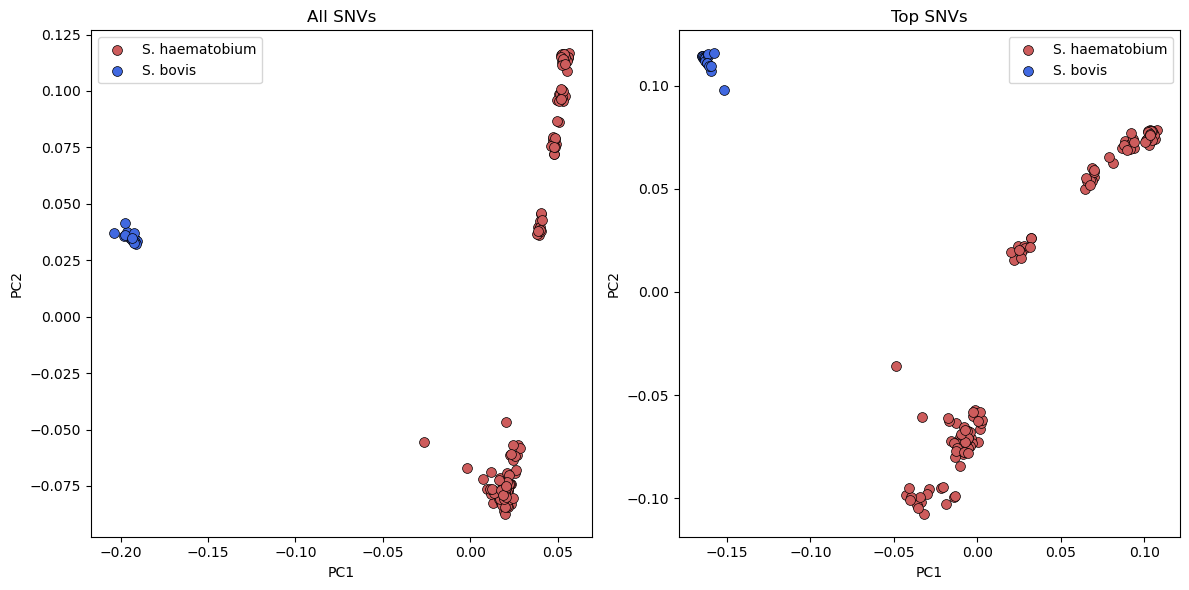

In [33]:
import matplotlib.pyplot as plt
import yaml
import pandas as pd

# Define directories
proj_dir = "/master/nplatt/schisto_aim_panel"
results_dir = f"{proj_dir}/results"

# Load data
info_df = pd.read_csv(f"{proj_dir}/data/platt_et_al_2025_stable1.csv", sep=",")
all_snvs_df = pd.read_csv(f"{results_dir}/pca/pca_df.csv", sep=",")
top_snvs_df = pd.read_csv(f"{results_dir}/pca/pca.top_variants.df.csv", sep=",")

# Filter for specific species
all_snvs_df = all_snvs_df[all_snvs_df["Predicted Species"].isin(["S. haematobium", "S. bovis"])]
top_snvs_df = top_snvs_df[top_snvs_df["Predicted Species"].isin(["S. haematobium", "S. bovis"])]

# Load YAML config
with open(f"{proj_dir}/code/plotting_config.yaml", "r") as config_file:
    config = yaml.safe_load(config_file)

# Create figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Subplot 1: All SNVs
for species in ["S. haematobium", "S. bovis"]:
    all_snv_data = all_snvs_df[all_snvs_df["Predicted Species"] == species]
    axes[0].scatter(
        all_snv_data["PC1"],
        all_snv_data["PC2"],
        color=config["species"][species]["color"],
        edgecolor="black",
        s=50,
        linewidths=0.5,
        label=species
    )
axes[0].set_xlabel("PC1")
axes[0].set_ylabel("PC2")
axes[0].set_title("All SNVs")
axes[0].legend()

# Subplot 2: Top SNVs
for species in ["S. haematobium", "S. bovis"]:
    top_snv_data = top_snvs_df[top_snvs_df["Predicted Species"] == species]
    axes[1].scatter(
        top_snv_data["PC1"],
        top_snv_data["PC2"],
        color=config["species"][species]["color"],
        edgecolor="black",
        s=50,
        linewidths=0.5,
        label=species
    )
axes[1].set_xlabel("PC1")
axes[1].set_ylabel("PC2")
axes[1].set_title("Top SNVs")
axes[1].legend()

# Adjust layout
plt.tight_layout()

# Save the figure
plt.savefig(f"pca_comparison.png", facecolor="white", dpi=600, bbox_inches="tight")
plt.savefig(f"pca_comparison.svg")

# Show plot
plt.show()

# SubSample variants

In [37]:
Path(f"{results_dir}/subsample_snvs").mkdir(parents=True, exist_ok=True)
os.chdir(f"{results_dir}/subsample_snvs")

In [49]:
target_n_snvs = [1000, 500, 400, 300, 250, 225, 200, 175, 150, 125, 100, 90, 80, 70, 60, 50, 40, 30, 20, 15, 10, 5, 4, 3, 2] 

## Subsample from all MAF05 LD variants

In [ ]:
target_df

In [61]:
import os
import numpy as np
import pandas as pd

# Set project and result directories
proj_dir = "/master/nplatt/schisto_aim_panel"
results_dir = f"{proj_dir}/results"
os.chdir(f"{results_dir}/subsample_snvs")

# Define constants
input_vcf = f"{results_dir}/prep_vcf/scan_autosomes_maf05_ld.vcf"
all_snvs_df = pd.read_csv(f"{results_dir}/pca/pca.eigenvec.var", sep="\t", header=0)
target_n_snvs = [1000, 500, 400, 300, 250, 225, 200, 175, 150, 125, 100, 90, 80, 70, 60, 50, 40, 30, 20, 15, 10, 5, 4, 3, 2] 
replicates = 100

# Loop over PCA types
for pca_type in ["all", "inf"]:
    # Load target SNV list
    if pca_type == "all":
        target_df = all_snvs_df.copy()
    elif pca_type == "inf":
        target_df = pd.read_csv(f"{results_dir}/pca/top_variants.list")
    else:
        raise ValueError(f"Invalid PCA type: {pca_type}")

    # Loop over target SNV counts and replicates
    for n_snvs in target_n_snvs:
        for rep in range(replicates):
            
            # Define filenames
            run_name = f"{pca_type}.subsample_n{n_snvs}_rep{rep}"
            output_snv_list = f"{run_name}.list"
            output_vcf = f"{run_name}.vcf"
            output_plink = run_name
            output_stdout = f"{run_name}.stdout"
            output_stderr = f"{run_name}.stderr"
            output_sge = f"{run_name}.sge.sh"

            # Sample SNVs
            random_seed = np.random.randint(0, 99999)
            sampled_snvs = target_df["ID"].sample(n=n_snvs, random_state=random_seed)
            sampled_snvs.to_csv(output_snv_list, index=False, header=False)

            # Build SGE shell script
            cmd = f"""#!/bin/bash
#$ -V
#$ -cwd
#$ -S /bin/bash
#$ -q all.q
#$ -pe smp 2
#$ -N {run_name}
#$ -o {output_stdout}
#$ -e {output_stderr}

conda run -n popgen --live-stream --cwd . vcftools --vcf {input_vcf} --snps {output_snv_list} --recode --recode-INFO-all --stdout > {output_vcf}
sleep 20s

conda run -n popgen --live-stream --cwd . plink2 --threads 2 --vcf {output_vcf} --pca 10 --double-id --allow-extra-chr --out {output_plink}
"""

            # Write shell script to file
            with open(output_sge, "w") as f:
                f.write(cmd)

            # Submit job
            os.system(f"qsub {output_sge}")


Your job 1448812 ("all.subsample_n1000_rep0") has been submitted
Your job 1448813 ("all.subsample_n1000_rep1") has been submitted
Your job 1448814 ("all.subsample_n1000_rep2") has been submitted
Your job 1448815 ("all.subsample_n1000_rep3") has been submitted
Your job 1448816 ("all.subsample_n1000_rep4") has been submitted
Your job 1448817 ("all.subsample_n1000_rep5") has been submitted
Your job 1448818 ("all.subsample_n1000_rep6") has been submitted
Your job 1448819 ("all.subsample_n1000_rep7") has been submitted
Your job 1448820 ("all.subsample_n1000_rep8") has been submitted
Your job 1448821 ("all.subsample_n1000_rep9") has been submitted
Your job 1448822 ("all.subsample_n1000_rep10") has been submitted
Your job 1448823 ("all.subsample_n1000_rep11") has been submitted
Your job 1448824 ("all.subsample_n1000_rep12") has been submitted
Your job 1448825 ("all.subsample_n1000_rep13") has been submitted
Your job 1448826 ("all.subsample_n1000_rep14") has been submitted
Your job 1448827 ("a

In [68]:
eigenvec_file

'inf.subsample_n70_rep82.eigenvec'

In [69]:
snv_type

'inf'

In [70]:
n_snvs

'70'

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from scipy.spatial import procrustes
import glob

# Set environment variables
proj_dir="/master/nplatt/schisto_aim_panel"
results_dir=f"{proj_dir}/results"
os.chdir(f"{results_dir}/subsample_snvs")

target_n_snvs = [1000, 500, 400, 300, 250, 225, 200, 175, 150, 125, 100, 90, 80, 70, 60, 50, 40, 30, 20, 15, 10, 5, 4, 3, 2] 
replicates = 100

procrustes_distances=[]
all_snvs_df = pd.read_csv(f"{results_dir}/pca/pca_df.csv", sep=",")
failed = "failed.pca.log"

for snv_type in ["all", "inf"]:
    for n_snvs in target_n_snvs:
        for rep in list(range(0, replicates)):
            try:
                #input
                eigenvec_file = f"{snv_type}.subsample_n{n_snvs}_rep{rep}.eigenvec"
                target_pca_df = pd.read_csv(eigenvec_file, sep="\t", header=0)

                #output
                png=eigenvec_file.replace("eigenvec", "pca.png")
                svg=png.replace("png", "svg")
                
                # Extract PC1 and PC2 coordinates from your dataframes
                X = all_snvs_df[["PC1", "PC2"]].to_numpy()
                Y = target_pca_df[["PC1", "PC2"]].to_numpy()
                        
                # Ensure both datasets have the same number of points
                if X.shape != Y.shape:
                    raise ValueError(f"Shapes of X {X.shape} and Y {Y.shape} must be the same for Procrustes analysis.")
                
                # Perform Procrustes analysis
                m1, m2, disparity = procrustes(X, Y)
                        
                # get Procrustes distance
                procrustes_distances.append([snv_type, n_snvs, rep, disparity])
                        
                # Plot the original scatter plots
                fig, axs = plt.subplots(1, 2, figsize=(12, 5))
                        
                # Original Scatter Plots
                axs[0].scatter(X[:, 0], X[:, 1], label=f"WG", color='blue', alpha=0.5, edgecolor="black", linewidth=0.5)
                axs[0].scatter(Y[:, 0], Y[:, 1], label=f"Sub", color='red', alpha=0.5, edgecolor="black", linewidth=0.5)
                axs[0].set_title("Original Scatter Plots")
                axs[0].legend()
                        
                # Aligned Scatter Plots after Procrustes transformation
                axs[1].scatter(m1[:, 0], m1[:, 1], label=f"WG", color='blue', alpha=0.5, edgecolor="black", linewidth=0.5)
                axs[1].scatter(m2[:, 0], m2[:, 1], label=f"Sub", color='red', alpha=0.5, edgecolor="black", linewidth=0.5)
                axs[1].set_title("Procrustes Aligned Scatter Plots")
                axs[1].legend()
                        
                # Save the figure
                plt.savefig(png, facecolor="white", dpi=600, bbox_inches="tight")
                plt.savefig(svg)
                plt.close()

            except:
                with open(failed, 'a') as out:
                    out.write(f"{snv_type},{n_snvs},{n_rep}")
                    
# Convert results to a DataFrame and save
procrustes_df = pd.DataFrame(procrustes_distances, columns=["snv_type", "n_snvs", "replicate", "procrustes_distance"])
procrustes_df.to_csv("procrustes.csv", index=False, header=True, sep=",")

In [80]:
procrustes_df

,snv_type,n_snvs,replicate,procrustes_distance
0,all,125,19,0.044069
1,all,15,70,0.714779
2,inf,100,83,0.133410
3,all,250,58,0.021980
4,all,250,15,0.020360
5,inf,250,79,0.042997
6,all,300,19,0.016918
7,all,10,21,0.280924
8,all,50,71,0.087420
9,inf,70,82,0.151157


In [ ]:
procrustes_df

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from scipy.spatial import procrustes
import glob

# Set environment variables
proj_dir="/master/nplatt/schisto_aim_panel"
results_dir=f"{proj_dir}/results"
os.chdir(f"{results_dir}/subsample_snvs")


all_snvs_df = pd.read_csv(f"{results_dir}/pca/pca_df.csv", sep=",")
procrustes_distances=[]



for pca_type in ["all", "inf"]:

    # Create target dataframe
    if pca_type == "all":
        target_df = all_snvs_df.copy()
    elif pca_type == "inf":
        target_df = pd.read_csv(f"{results_dir}/pca/top_variants.list", sep=",", header=0)
    else:
        exit
        
   
            target_snvs_df = pd.read_csv(eigenvec, sep="\t", header=0)
            
            # Extract PC1 and PC2 coordinates from your dataframes
            X = all_snvs_df[["PC1", "PC2"]].to_numpy()
            Y = target_snvs_df[["PC1", "PC2"]].to_numpy()
            
            # Ensure both datasets have the same number of points
            if X.shape != Y.shape:
                raise ValueError(f"Shapes of X {X.shape} and Y {Y.shape} must be the same for Procrustes analysis.")
            
            # Perform Procrustes analysis
            m1, m2, disparity = procrustes(X, Y)
            
            # Print the Procrustes distance
            # print(f"Procrustes Distance (Disparity): {disparity}")
            procrustes_distances.append([n_snvs, replicate, disparity])
            
            # Plot the original scatter plots
            fig, axs = plt.subplots(1, 2, figsize=(12, 5))
            
            # Original Scatter Plots
            axs[0].scatter(X[:, 0], X[:, 1], label=f"WG", color='blue', alpha=0.5, edgecolor="black", linewidth=0.5)
            axs[0].scatter(Y[:, 0], Y[:, 1], label=f"Sub", color='red', alpha=0.5, edgecolor="black", linewidth=0.5)
            axs[0].set_title("Original Scatter Plots")
            axs[0].legend()
            
            # Aligned Scatter Plots after Procrustes transformation
            axs[1].scatter(m1[:, 0], m1[:, 1], label=f"WG", color='blue', alpha=0.5, edgecolor="black", linewidth=0.5)
            axs[1].scatter(m2[:, 0], m2[:, 1], label=f"Sub", color='red', alpha=0.5, edgecolor="black", linewidth=0.5)
            axs[1].set_title("Procrustes Aligned Scatter Plots")
            axs[1].legend()
            
            # Save the figure
            plt.savefig(png, facecolor="white", dpi=600, bbox_inches="tight")
            plt.savefig(svg)
            plt.close()
            
    # Convert results to a DataFrame and save
    procrustes_df = pd.DataFrame(procrustes_distances, columns=["n_snvs", "replicate", "procrustes_distance"])
    procrustes_df.to_csv(proc_csv, index=False)

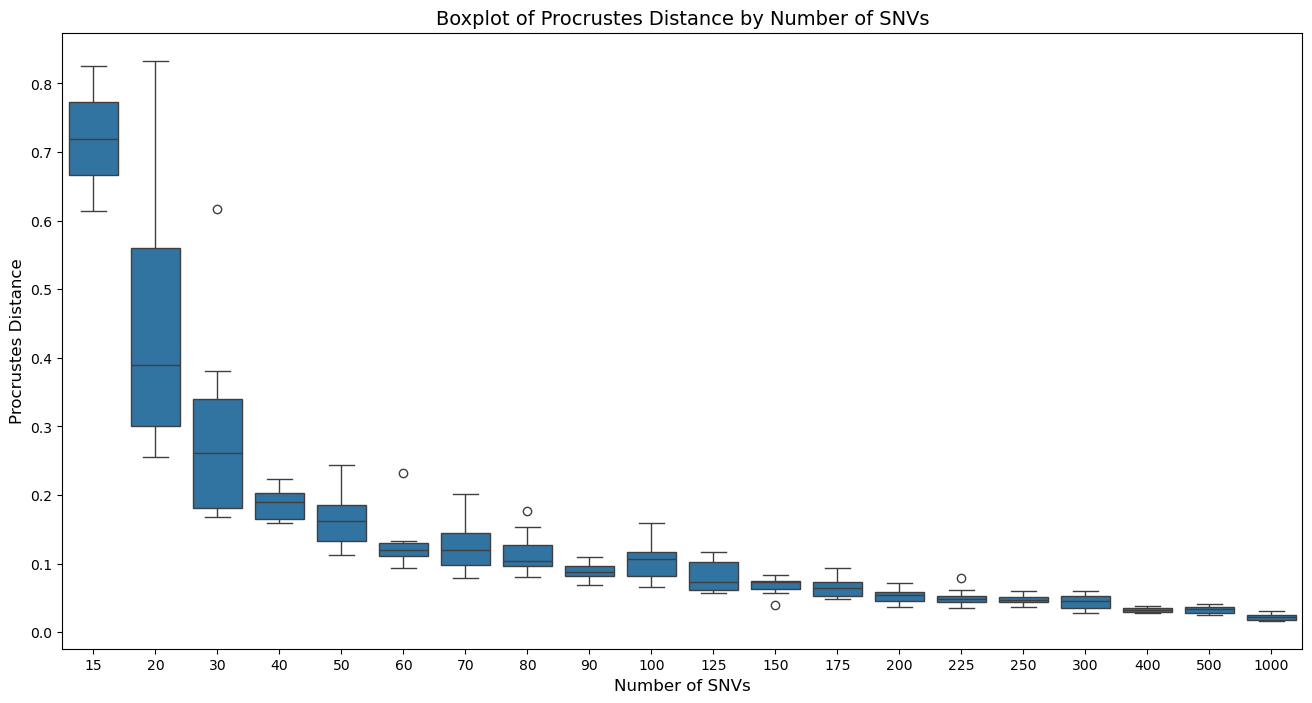

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a boxplot grouped by 'n_snvs' using 'procrustes_distance' as values
plt.figure(figsize=(16, 8))
sns.boxplot(x="n_snvs", y="procrustes_distance", data=procrustes_df)

# Set labels and title
plt.xlabel("Number of SNVs", fontsize=12)
plt.ylabel("Procrustes Distance", fontsize=12)
plt.title("Boxplot of Procrustes Distance by Number of SNVs", fontsize=14)

# Show the plot
plt.show()


## Subsample from MAF05 LD PCA informative variants

In [62]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from scipy.spatial import procrustes

# Set environment variables
proj_dir="/master/nplatt/schisto_aim_panel"
results_dir=f"{proj_dir}/results"
os.chdir(f"{results_dir}/subsample_top_snvs")
max_pcs = 2
n_snvs_per_pc = 3000
all_snvs_df = pd.read_csv(f"{results_dir}/pca/pca_df.csv", sep=",")
procrustes_distances=[]
pca_df = pd.read_csv(f"{results_dir}/pca/top_variants_pc1-{max_pcs}_n{n_snvs_per_pc}.list", sep=",", header=0)

# Create target dataframe
target_df = pd.read_csv(f"{results_dir}/pca/top_variants_pc1-{max_pcs}_n{n_snvs_per_pc}.list", sep=",", header=0)
target_df = target_df.rename({"ID": "snv_id"}, axis=1)

# Loop through different sample sizes and replicates
for n_snvs in list(range(200, 1, -25)):
    print(n_snvs)
    for replicate in range(10):
        # Set a unique random seed per replicate for consistency
        random_seed = np.random.randint(0, 99999)

        # Sample SNVs
        sampled_snvs = target_df["snv_id"].sample(n=n_snvs, random_state=random_seed)
        
        # Save the sampled SNVs to a file
        sample_file = f"inf.subsample_n{n_snvs}_rep{replicate}.list"
        sampled_snvs.to_csv(sample_file, sep=",", header=False, index=False)

        # Define VCF file names
        input_vcf = f"{results_dir}/prep_vcf/scan_autosomes_maf05_ld.vcf"
        output_plink=f"inf.subsample_n{n_snvs}_rep{replicate}"
        output_vcf = f"inf.subsample_n{n_snvs}_rep{replicate}.vcf"
        vcftools_log = f"inf.subsample_n_n{n_snvs}_rep{replicate}.vcftools.log"
        plink2_log = f"inf.subsample_n_n{n_snvs}_rep{replicate}.plink2.log"
        png=f"inf.subsample_n{n_snvs}_rep{replicate}.pca.png"
        svg=f"inf.subsample_n{n_snvs}_rep{replicate}.pca.svg"
        eigenvec=f"inf.subsample_n{n_snvs}_rep{replicate}.eigenvec"

         # Run VCFTOOLS and log output
        os.system(f"""
        conda run -n popgen --cwd . --live-stream \
            vcftools \
                --vcf {input_vcf} \
                --snps {sample_file} \
                --recode \
                --recode-INFO-all \
                --stdout > {output_vcf} 2> {vcftools_log}
        """)
        
        # Run PLINK2 for PCA and log output
        os.system(f"""
        conda run -n popgen --cwd . --live-stream \
            plink2 \
                --threads 12 \
                --vcf {output_vcf} \
                --pca 10 \
                --double-id \
                --allow-extra-chr \
                --out {output_plink} \
            > {plink2_log} 2>&1
        """)

        target_snvs_df = pd.read_csv(eigenvec, sep="\t", header=0)
        
        # Extract PC1 and PC2 coordinates from your dataframes
        X = all_snvs_df[["PC1", "PC2"]].to_numpy()
        Y = target_snvs_df[["PC1", "PC2"]].to_numpy()
        
        # Ensure both datasets have the same number of points
        if X.shape != Y.shape:
            raise ValueError(f"Shapes of X {X.shape} and Y {Y.shape} must be the same for Procrustes analysis.")
        
        # Perform Procrustes analysis
        m1, m2, disparity = procrustes(X, Y)
        
        # Print the Procrustes distance
        # print(f"Procrustes Distance (Disparity): {disparity}")
        procrustes_distances.append([n_snvs, replicate, disparity])
        
        # Plot the original scatter plots
        fig, axs = plt.subplots(1, 2, figsize=(12, 5))
        
        # Original Scatter Plots
        axs[0].scatter(X[:, 0], X[:, 1], label=f"WG", color='blue', alpha=0.5, edgecolor="black", linewidth=0.5)
        axs[0].scatter(Y[:, 0], Y[:, 1], label=f"Sub", color='red', alpha=0.5, edgecolor="black", linewidth=0.5)
        axs[0].set_title("Original Scatter Plots")
        axs[0].legend()
        
        # Aligned Scatter Plots after Procrustes transformation
        axs[1].scatter(m1[:, 0], m1[:, 1], label=f"WG", color='blue', alpha=0.5, edgecolor="black", linewidth=0.5)
        axs[1].scatter(m2[:, 0], m2[:, 1], label=f"Sub", color='red', alpha=0.5, edgecolor="black", linewidth=0.5)
        axs[1].set_title("Procrustes Aligned Scatter Plots")
        axs[1].legend()
        
        # Save the figure
        plt.savefig(png, facecolor="white", dpi=600, bbox_inches="tight")
        plt.savefig(svg)
        plt.close()
        
# Convert results to a DataFrame and save
procrustes_df = pd.DataFrame(procrustes_distances, columns=["n_snvs", "replicate", "procrustes_distance"])
procrustes_df.to_csv("inf.procrustes_distances.csv", index=False)


200
175
150
125
100
75
50
25


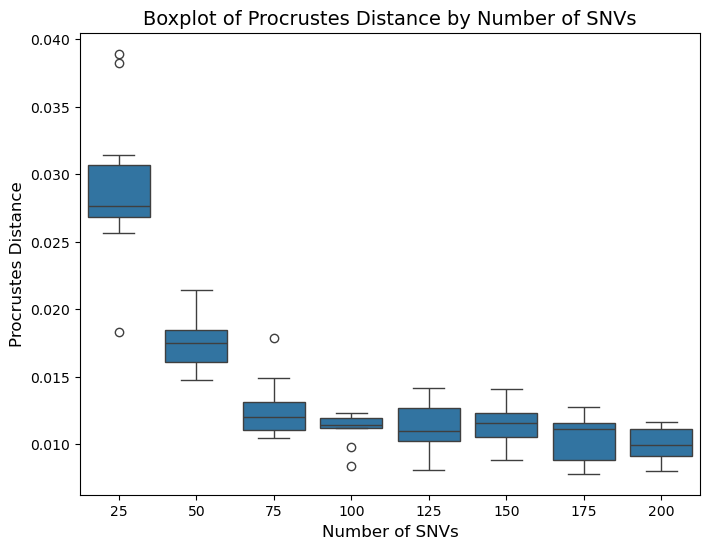

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a boxplot grouped by 'n_snvs' using 'procrustes_distance' as values
plt.figure(figsize=(8, 6))
sns.boxplot(x="n_snvs", y="procrustes_distance", data=procrustes_df)

# Set labels and title
plt.xlabel("Number of SNVs", fontsize=12)
plt.ylabel("Procrustes Distance", fontsize=12)
plt.title("Boxplot of Procrustes Distance by Number of SNVs", fontsize=14)

# Show the plot
plt.show()
